# Optimización de Portafolio de Inversión

**Integrantes**:

1. Miguel de Jesús Aguirre Orozco

2. Berlín Preciado Escalera

3. Miriam Eunice Rosas Medellín

**Profesor**: Alberto Arjona

**Materia**: Simulación Matemática

**Ciclo**: Verano 2019

**Carrera**: Ingeniería Financiera

**Escuela**: Departamento de Matemáticas y Física (DMAF) del Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO), A.C.

## Primera Parte: Selección de Activos

Utilizamos el inspector de acciones de Yahoo Finanzas para ver cual es el top 10 de firmas con mayor rendimiento en la región de México. Las empresas que resulten las someteremos a una simulación de probabilidad precio umbral para descartar la mitad y finalmente poder seleccionar las cinco acciones en específico que contendrá nuestra cartera de inversión. La lista es la siguiente.

1. Cigna Corporation (7.44%)
2. Volkswagen AG (7.39%)
3. Itaú Unibanco Holding S.A. (5.21%)
4. Nemak, S. A. B. de C. V. (4.48%)
5. Ross Stores, Inc. (4.18%)
6. Caterpillar Inc. (3.93%)
7. Nokia Corporation (3.57%)
8. Walmart Inc.(3.49%)
9. Controladora Vuela Compañía de Aviación, S.A.B. de C.V. (3.48%)
10. Leidos Holdings, Inc. (3.43%)

Como queremos que nuestro portafolio de inversión tenga un vencimiento de cinco años, el análisis de la probabilidad precio umbral la realizaremos con los precios históricos de los últimos cinco años; es decir, desde el principio del 2013 hasta el final del 2018. Esto con el objetivo de evitar tendencias a corto plazo que podrían aparecer si sólo utilizamos los precios de uno o dos años.

**Nota**: Tuvimos que descartar dos de las empresas que se encontraban en el top 10 y reemplazarlas por el siguiente par debido a que por alguna razón, el código presentaba un error en las fechas de cierre que no pudimos remediar. Estas empresas eran INFOSYS LTD y Humana Inc.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
def get_historical_closes(ticker,start_date,end_date=None):
    closes=web.YahooDailyReader(ticker,start_date,end_date).read()
    return pd.DataFrame(closes.loc[:,"Adj Close"])
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
def daily_ret_sim(mu,sigma,ndays,ntraj,start_date):
    dates=pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays,ntraj)+mu,index=dates)

### Cigna Corporation

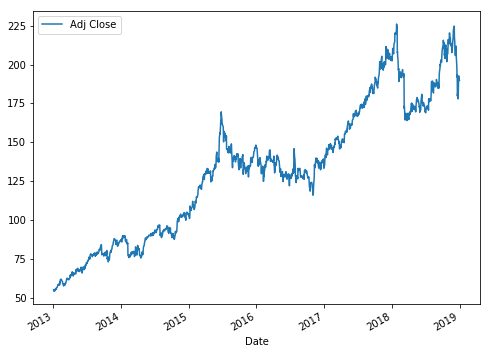

In [2]:
ticker="CI"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [3]:
closes.iloc[-1]

Adj Close    189.873627
Name: 2018-12-31 00:00:00, dtype: float64

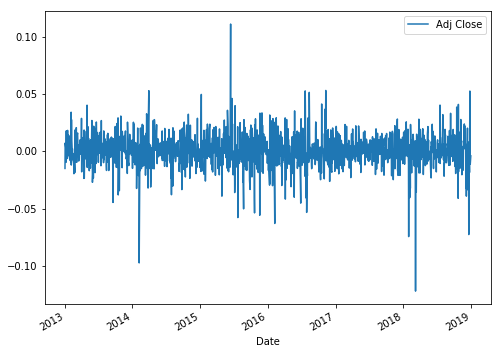

In [4]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [5]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0008208480754252479, 0.014894597478233948)

In [6]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,-0.001055,0.031418,0.022617,0.004891,-0.015831,0.011198,0.018763,-0.002040,0.015187,0.003650,-0.001694,-0.008631,0.015775
2019-01-02,0.008033,0.021867,-0.006882,-0.017071,0.022601,-0.002234,0.027610,-0.010105,0.016928,-0.010929,-0.011398,-0.001144,0.007905
2019-01-03,0.002714,-0.026126,-0.004419,-0.009390,0.009510,-0.010220,0.005872,-0.021219,0.014025,0.000585,0.008868,0.013968,0.006555
2019-01-04,0.007307,0.011362,0.021539,0.002220,0.023852,-0.023757,-0.007723,-0.011976,-0.020503,-0.004100,0.002057,0.013055,-0.038941
2019-01-05,-0.000303,-0.003455,0.009266,-0.006828,-0.001377,-0.009614,0.006934,0.005340,0.016357,0.013348,0.003640,-0.004475,-0.024910
2019-01-06,-0.000067,-0.006689,-0.003367,0.011482,-0.013167,-0.010274,-0.009190,0.006800,-0.034576,-0.003303,-0.003199,0.012509,0.008921
2019-01-07,-0.017260,0.026688,0.016202,-0.026203,0.000022,-0.003103,-0.003264,-0.004394,-0.018982,-0.016958,0.015318,0.025461,-0.005731
2019-01-08,0.023080,-0.015663,-0.015270,0.009233,0.000992,0.018832,-0.002641,-0.008078,0.003500,0.025250,-0.012449,-0.037533,0.005402
2019-01-09,-0.023104,0.003130,-0.007475,0.028883,-0.000985,0.001844,0.003342,-0.011256,-0.015073,-0.005409,0.027364,0.028502,-0.002005
2019-01-10,-0.000139,-0.000496,0.004890,0.025920,-0.018598,0.012405,0.007477,-0.003134,-0.009415,-0.000163,0.010206,-0.003217,0.019450


### Volkswagen AG

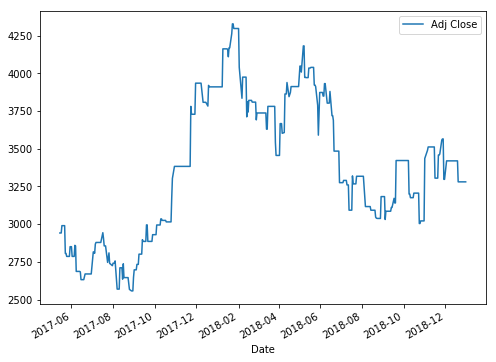

In [7]:
ticker="VOW3N.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [8]:
closes.iloc[-1]

Adj Close    3280.551025
Name: 2018-12-31 00:00:00, dtype: float64

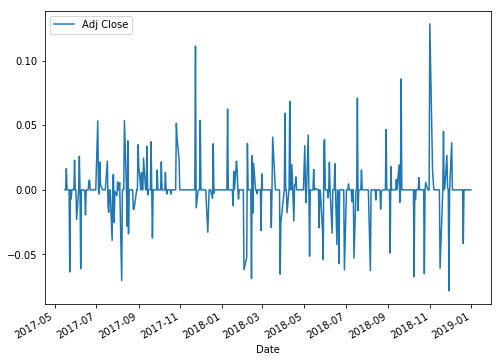

In [9]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [10]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.00026548638786011246, 0.02135695576969283)

In [11]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,-0.036432,0.005775,-0.009372,0.027884,-0.006523,-0.012027,-0.004330,0.011315,-0.021532,-0.029218,0.011530,-0.001839,-0.009178
2019-01-02,0.026185,-0.009178,0.008677,0.012787,-0.001291,0.013268,0.005176,-0.000247,0.013542,0.001566,0.005482,-0.004590,-0.008018
2019-01-03,0.029792,0.014989,-0.004676,0.003179,0.002380,-0.015815,0.003726,0.011691,-0.043317,0.005278,-0.028085,0.019402,-0.007841
2019-01-04,0.026420,0.042490,-0.049306,-0.001800,-0.030368,0.009444,-0.009350,-0.027632,-0.000217,0.003613,0.031015,-0.023661,-0.000318
2019-01-05,0.029421,0.009073,0.011231,-0.011671,0.025478,-0.027356,-0.018407,0.012334,-0.042956,-0.023575,0.033253,-0.021439,-0.007485
2019-01-06,-0.026204,0.011955,-0.012150,-0.015511,0.050764,-0.014852,-0.003793,-0.009188,-0.022903,-0.007116,0.016100,-0.010473,-0.005466
2019-01-07,-0.025717,-0.008158,-0.011834,0.023857,-0.011231,-0.048107,0.004559,-0.023392,0.001598,-0.014730,-0.022424,-0.056354,0.028637
2019-01-08,-0.007599,-0.016755,-0.034972,-0.012124,0.023500,0.022580,-0.038721,0.026940,-0.006002,0.018224,0.027513,-0.017838,-0.002682
2019-01-09,-0.039570,0.004407,-0.005880,0.055729,-0.031244,0.047907,0.012010,-0.005249,-0.006717,0.004180,-0.019912,0.057984,0.002328
2019-01-10,0.032830,0.001654,0.006762,0.003165,0.008098,-0.001346,0.028453,-0.016025,-0.008019,0.008529,-0.013984,-0.004875,-0.017191


### Itaú Unibanco Holding S.A.

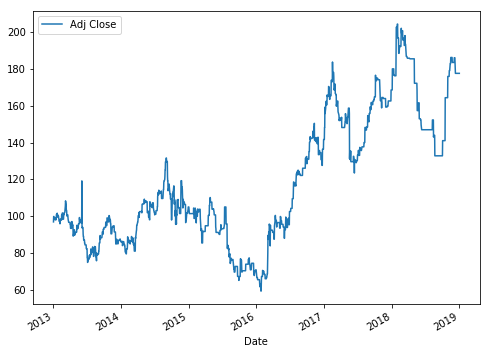

In [12]:
ticker="ITUBN.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [13]:
closes.iloc[-1]

Adj Close    177.729767
Name: 2018-12-31 00:00:00, dtype: float64

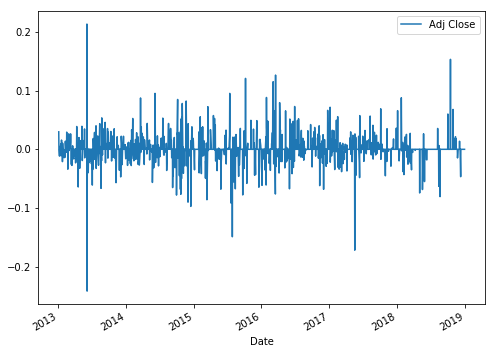

In [14]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [15]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0004031992905986871, 0.02319616821837994)

In [16]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,-0.016217,-0.027556,0.003260,0.033843,0.019663,-0.036057,0.038725,-0.019022,-0.018153,0.026081,0.033567,0.012595,-0.021811
2019-01-02,0.013742,0.022192,-0.013332,-0.013218,-0.007866,0.037892,0.007057,-0.017680,0.030823,0.014289,-0.007406,0.014369,-0.014289
2019-01-03,-0.015155,-0.021274,0.002272,-0.030854,-0.024719,0.011314,0.006047,0.002267,-0.033730,0.027419,0.018568,-0.004829,-0.002266
2019-01-04,-0.019702,-0.032723,-0.034548,0.019170,-0.021178,0.009641,0.042104,0.010195,-0.027453,-0.020373,0.026796,-0.000592,0.033880
2019-01-05,-0.041980,-0.003806,-0.011690,-0.009252,-0.007907,0.056356,0.028291,-0.032366,0.001439,0.022217,0.010565,0.050832,0.027421
2019-01-06,0.020576,-0.014890,0.010143,-0.002969,-0.023649,0.001087,0.007374,0.033368,0.003496,0.005340,-0.028419,-0.001725,-0.005403
2019-01-07,-0.018955,-0.011068,0.040023,-0.044969,-0.002061,0.005848,-0.018251,0.029433,-0.047960,-0.028954,-0.001043,-0.036136,-0.000824
2019-01-08,0.012372,0.011818,-0.039576,-0.056495,-0.005386,-0.003967,0.022627,-0.009208,0.024202,-0.017910,-0.007760,-0.025329,-0.007955
2019-01-09,-0.026740,-0.002295,0.039691,0.005700,-0.032828,-0.037485,0.015360,0.013277,-0.000811,-0.017376,0.020072,-0.001945,-0.033386
2019-01-10,0.028577,-0.001515,-0.005592,-0.031995,-0.043687,0.028299,0.019786,-0.008871,-0.007271,0.019318,0.041665,0.018626,-0.016721


### Nemak, S. A. B. de C. V.

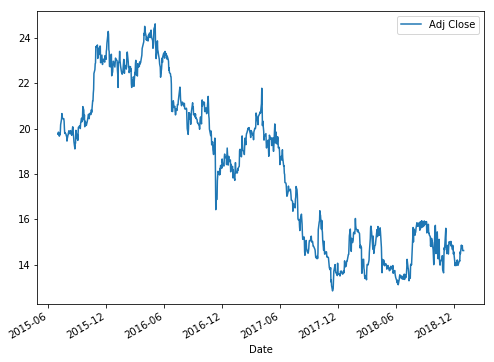

In [17]:
ticker="NEMAKA.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [18]:
closes.iloc[-1]

Adj Close    14.620543
Name: 2018-12-31 00:00:00, dtype: float64

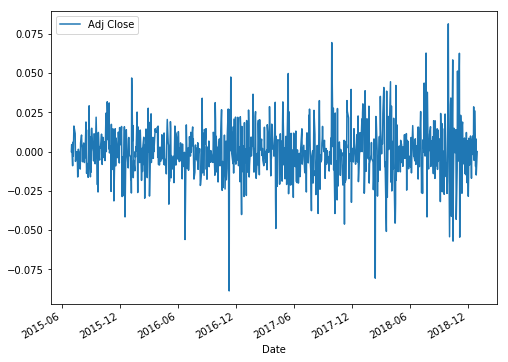

In [19]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [20]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(-0.00034163120118556393, 0.016954502369632043)

In [21]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,0.021112,-0.019436,0.014840,-0.052632,0.008239,-0.021323,-0.023084,-0.007872,-0.003247,-0.008668,-0.013049,0.027924,-0.026405
2019-01-02,-0.000376,0.005682,0.005077,-0.024116,0.013687,0.012633,-0.007661,0.033601,0.038470,-0.009438,-0.001891,-0.020251,-0.012917
2019-01-03,0.011943,-0.009165,0.005408,0.016550,-0.022857,-0.009454,-0.025915,0.024748,-0.009815,-0.006854,-0.007647,-0.025208,-0.004052
2019-01-04,-0.010588,0.004606,-0.050848,-0.020723,0.026685,-0.002138,0.021192,0.000889,-0.001814,-0.001055,0.031997,0.001866,0.027556
2019-01-05,-0.004007,-0.007618,0.009563,0.021606,0.003793,-0.008861,-0.018732,0.001865,0.023523,-0.003656,0.002273,-0.001719,-0.023685
2019-01-06,-0.023250,0.002487,0.007190,0.000437,-0.001579,-0.010808,0.003116,-0.023710,0.029010,0.019184,0.018265,0.008623,-0.042743
2019-01-07,-0.019323,0.010357,0.030607,-0.010608,-0.000016,-0.003516,-0.042185,0.000355,-0.011767,-0.017094,0.021837,-0.016487,-0.016657
2019-01-08,-0.000904,0.011425,-0.023663,0.001457,0.014609,-0.020398,-0.018809,0.002840,0.005557,-0.004637,-0.017509,-0.010869,-0.000267
2019-01-09,-0.019023,-0.002928,-0.014280,0.016570,-0.007862,-0.008351,0.003352,-0.001147,0.021720,-0.010017,0.004199,0.000637,-0.024918
2019-01-10,0.015895,0.031217,0.001888,-0.001831,-0.018654,0.022724,0.017786,0.010656,-0.020066,0.018823,0.007330,0.002831,-0.004001


### Ross Stores, Inc.

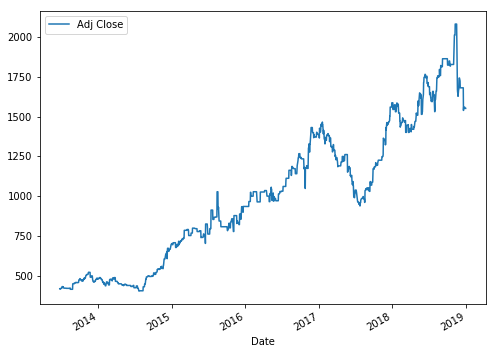

In [22]:
ticker="ROST.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [23]:
closes.iloc[-1]

Adj Close    1551.430054
Name: 2018-12-31 00:00:00, dtype: float64

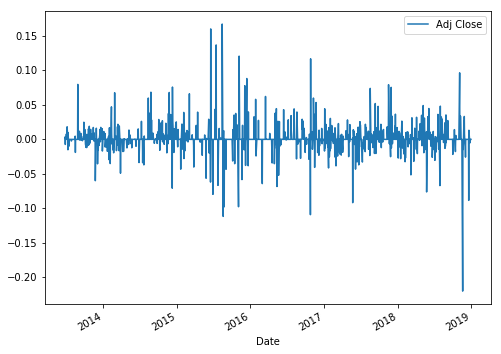

In [24]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [25]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0009438675083141927, 0.01947564147355173)

In [26]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,-0.016596,-0.013649,0.028608,0.014871,0.011051,0.008827,0.002771,0.006675,0.018814,0.026510,0.013902,-0.015474,-0.015906
2019-01-02,-0.047365,0.003843,0.016643,-0.005221,0.007325,-0.035465,-0.037655,0.035607,0.003990,0.004455,-0.028834,-0.019669,0.003739
2019-01-03,0.029119,0.007223,-0.029864,-0.005414,0.026288,-0.016254,-0.006560,-0.027198,0.036892,-0.012811,0.003640,-0.019244,0.002516
2019-01-04,-0.022217,-0.011846,-0.013065,0.013332,0.015562,-0.013736,0.003908,-0.021560,0.011973,0.001898,0.029865,0.011423,0.024734
2019-01-05,-0.002257,0.032774,0.006180,0.019047,-0.022156,0.041197,-0.024580,-0.019504,-0.031406,0.025490,0.014435,0.001771,-0.036784
2019-01-06,0.054642,-0.016909,0.010714,0.004981,-0.006942,0.024294,-0.041283,-0.000740,-0.022188,0.013205,0.011392,0.026692,-0.023651
2019-01-07,0.019017,-0.045211,0.003783,-0.006268,0.012797,0.004391,-0.000370,0.026317,0.006161,0.009893,0.013525,-0.007410,0.020210
2019-01-08,0.012288,-0.018845,0.045031,0.008544,-0.002233,-0.003409,-0.046239,0.015487,-0.009170,-0.003813,-0.028136,0.011729,0.025284
2019-01-09,-0.008344,0.012157,-0.013893,-0.056147,0.020568,-0.007061,-0.013350,0.003667,0.001928,0.010832,-0.001387,0.039937,0.006465
2019-01-10,0.048068,0.007995,-0.003674,-0.034827,0.032249,-0.007738,0.000355,0.012019,0.025816,0.001902,0.038109,0.033647,-0.007297


### Caterpillar Inc.

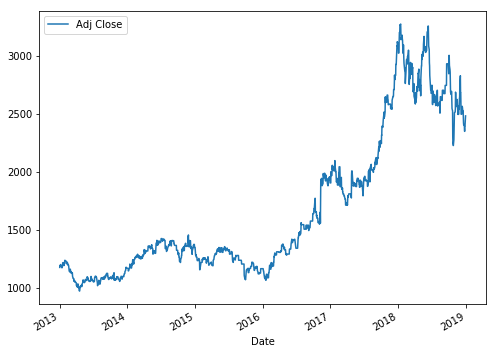

In [27]:
ticker="CAT.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [28]:
closes.iloc[-1]

Adj Close    2483.924072
Name: 2018-12-31 00:00:00, dtype: float64

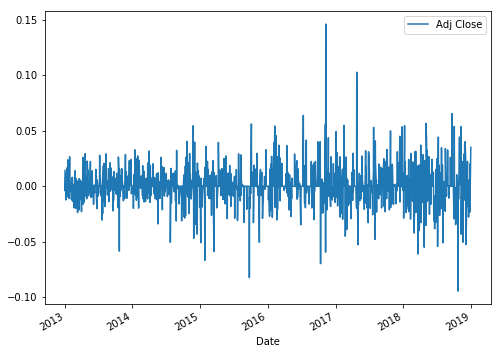

In [29]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [30]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0004948162318665457, 0.01628708204289034)

In [31]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,0.008252,-0.017637,0.003582,0.010275,0.040052,-0.025829,0.018318,0.021376,0.025803,0.035708,-0.010848,0.000089,-0.010504
2019-01-02,-0.001059,-0.000716,-0.003918,0.000826,-0.033675,0.008756,-0.007701,0.012512,0.019127,-0.037486,-0.018970,0.013374,0.007813
2019-01-03,-0.022431,0.002727,-0.026323,-0.021728,0.009643,-0.001046,0.019374,-0.002774,-0.020039,-0.004160,-0.011558,-0.032341,-0.031681
2019-01-04,0.010048,0.001708,0.016300,-0.007169,0.001943,0.025932,-0.009702,-0.004827,0.005346,0.003631,0.007291,0.023272,0.021073
2019-01-05,0.019427,0.001159,0.002175,-0.001248,-0.012799,0.014267,-0.008307,-0.023540,0.002300,0.000279,0.037630,-0.002506,0.007407
2019-01-06,-0.002875,-0.027820,0.028119,-0.010322,-0.012948,0.010066,0.003497,0.003285,-0.026901,0.005487,0.017147,-0.045669,0.008398
2019-01-07,-0.005401,0.005873,0.015453,0.015281,0.004604,0.004872,-0.008412,-0.010832,0.008350,0.008861,-0.004768,-0.010488,0.007422
2019-01-08,0.011061,-0.014563,-0.021728,0.025489,0.002013,0.035534,0.028488,-0.003241,0.012788,-0.020883,0.003576,0.006806,-0.008294
2019-01-09,-0.008459,0.014377,0.025578,-0.012726,0.007177,-0.003888,-0.012053,-0.000076,0.000610,-0.009360,0.000654,-0.006233,0.011601
2019-01-10,0.000224,0.007847,0.020760,-0.018791,0.019480,-0.025760,0.001084,0.007553,-0.013686,-0.004616,-0.002478,0.007364,-0.000449


### Nokia Corporation

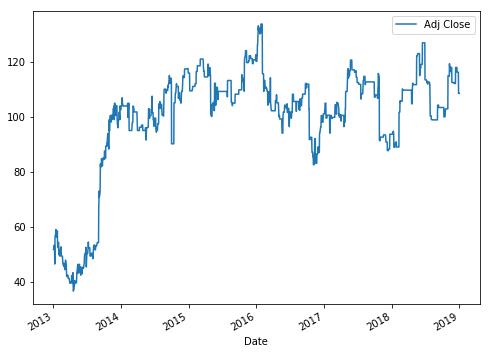

In [32]:
ticker="NOKN.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [33]:
closes.iloc[-1]

Adj Close    108.53614
Name: 2018-12-31 00:00:00, dtype: float64

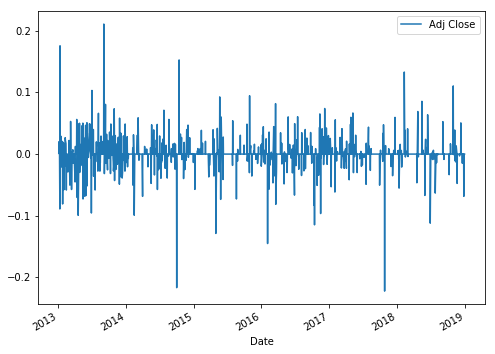

In [34]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [35]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0004903223305875184, 0.023481690880104704)

In [36]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,0.021734,0.001234,0.015150,-0.020646,0.029125,0.013569,0.008097,0.019267,0.024435,0.016307,0.007581,0.001483,0.009388
2019-01-02,0.016797,0.010746,0.031201,-0.017855,0.001627,0.020402,0.038165,-0.015670,-0.012789,0.025875,-0.022456,-0.030876,-0.035788
2019-01-03,-0.006409,-0.029941,-0.019970,0.020825,-0.043180,0.020126,0.018905,-0.007599,0.027044,0.025636,0.015860,0.029204,0.049051
2019-01-04,0.006270,0.003754,0.016302,0.039375,-0.032661,-0.012952,0.040542,0.009941,-0.000134,0.022548,-0.019165,0.040380,-0.058564
2019-01-05,-0.011164,0.005515,0.007378,0.030849,0.009706,0.033246,-0.005872,-0.005140,0.038341,-0.014656,-0.019706,-0.009489,-0.033570
2019-01-06,-0.016154,0.000855,-0.018490,-0.001317,-0.039593,-0.026755,0.001517,0.001801,0.023532,0.022658,0.011786,0.001643,0.006526
2019-01-07,-0.017313,-0.015893,0.007437,0.018091,0.040651,0.020791,0.043236,-0.009225,-0.004282,-0.088124,0.010647,0.016591,0.030317
2019-01-08,-0.009443,0.012401,-0.012716,0.021181,0.015951,-0.006195,-0.030881,-0.023323,0.001254,-0.016222,-0.030408,0.027193,-0.005198
2019-01-09,-0.042519,-0.019911,0.006881,-0.014611,0.007431,0.040195,0.001676,0.003228,-0.010013,-0.047218,0.009066,-0.010908,-0.013294
2019-01-10,-0.015221,-0.030417,0.004256,0.017854,-0.008899,-0.033733,0.052748,0.005399,0.040913,-0.007766,-0.037034,0.023646,-0.027934


### Walmart Inc.

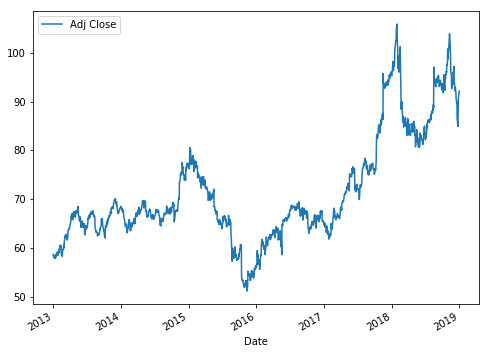

In [37]:
ticker="WMT"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [38]:
closes.iloc[-1]

Adj Close    92.161888
Name: 2018-12-31 00:00:00, dtype: float64

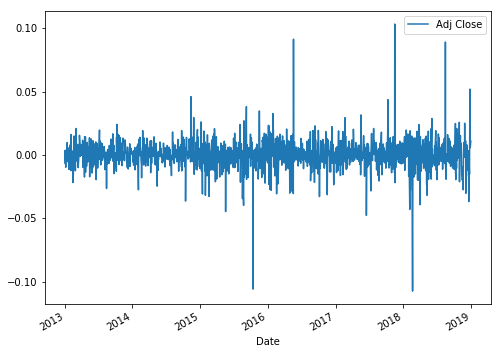

In [39]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [40]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0002986570242321939, 0.01159546461107912)

In [41]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,-0.002638,-0.013861,-0.001317,0.009091,0.003272,0.010964,-0.005001,-0.000977,-0.011304,-0.021081,0.022847,-0.001514,-0.000750
2019-01-02,0.013110,-0.021681,0.002382,0.006040,-0.001550,-0.015924,0.002123,-0.006887,-0.013558,0.005734,0.002364,0.005493,0.011789
2019-01-03,-0.006139,-0.007230,-0.012873,0.004120,0.007794,0.009030,-0.005200,-0.014484,0.008107,-0.006490,0.024979,-0.010054,0.007271
2019-01-04,0.004978,0.004976,0.015706,0.005038,-0.028208,-0.015158,-0.004539,0.000401,-0.012371,0.011300,-0.006762,-0.012430,0.006419
2019-01-05,-0.004162,0.006840,0.003388,0.013056,0.008171,-0.001167,-0.009505,0.002820,0.015365,-0.005210,0.006515,0.007418,-0.000729
2019-01-06,0.012171,0.002787,-0.004958,0.014738,0.008113,0.003349,-0.001224,-0.001066,-0.004066,0.002403,-0.008040,0.003232,-0.002129
2019-01-07,-0.011849,-0.013893,-0.000600,-0.007743,-0.000743,0.006493,-0.009561,-0.008687,-0.026237,-0.003879,0.006138,-0.002062,-0.017840
2019-01-08,0.002088,-0.003325,-0.005012,0.012741,0.013782,-0.004805,0.010622,0.002297,-0.007524,0.001388,0.005148,0.004116,0.008926
2019-01-09,-0.004494,0.023195,-0.002384,0.001967,-0.002820,0.002215,-0.001851,-0.001335,-0.004679,0.003204,0.009433,-0.012730,-0.016877
2019-01-10,0.011326,-0.010979,0.005262,-0.009822,0.016491,0.001582,0.016694,-0.009243,-0.002386,-0.004663,0.013785,0.003005,0.010481


### Controladora Vuela Compañía de Aviación, S.A.B. de C.V.

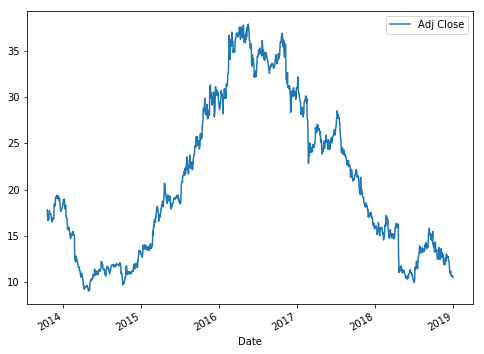

In [42]:
ticker="VOLARA.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [43]:
closes.iloc[-1]

Adj Close    10.48
Name: 2018-12-31 00:00:00, dtype: float64

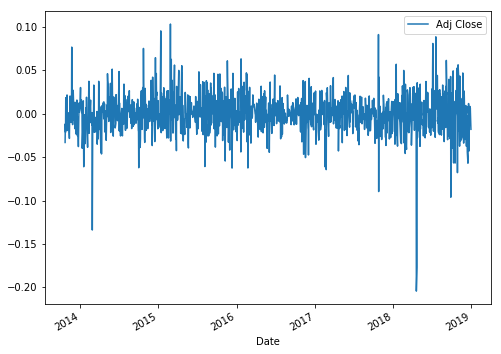

In [44]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [45]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(-0.00040685850938795685, 0.022634775203078366)

In [46]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,0.009666,-0.004050,0.022441,0.013063,0.032861,0.000926,0.014087,0.014302,-0.000965,0.018580,0.002236,-0.024351,0.001695
2019-01-02,-0.038944,-0.001369,-0.009221,0.020257,0.041686,-0.017267,0.020066,0.061162,0.022074,0.029767,0.021749,-0.028608,0.002884
2019-01-03,-0.036426,0.015857,-0.014094,0.013397,0.000526,0.068061,0.013870,-0.024618,0.039677,-0.014607,-0.026543,0.034805,-0.016966
2019-01-04,-0.026454,-0.013783,0.001463,0.009305,0.009944,-0.020902,-0.041827,-0.027859,-0.016115,-0.009959,0.048093,-0.048956,-0.057829
2019-01-05,0.002092,-0.004499,-0.009033,0.003579,0.016637,-0.019181,0.022778,-0.028331,-0.010492,0.001514,0.000748,-0.041541,0.040783
2019-01-06,0.021240,-0.013010,-0.008869,-0.037742,0.027681,0.018910,-0.012836,0.062516,-0.005769,-0.042273,0.028608,0.044778,0.020949
2019-01-07,-0.000622,0.008531,0.014012,-0.020962,-0.039513,-0.014824,-0.004856,0.002341,-0.047755,0.034071,0.010751,-0.006172,0.012094
2019-01-08,0.028137,-0.024972,-0.022156,0.012715,-0.017061,-0.019039,0.009440,0.001036,0.017705,0.002522,-0.014750,0.019796,-0.018921
2019-01-09,0.026731,-0.011352,0.011519,0.008419,-0.032516,0.008710,-0.024057,-0.014085,-0.041176,-0.007681,0.015099,0.022300,-0.025534
2019-01-10,0.006467,0.029138,0.024866,-0.007156,0.015275,0.029886,0.002783,-0.012019,0.025967,0.041460,-0.008923,-0.010616,-0.016678


### Leidos Holdings, Inc

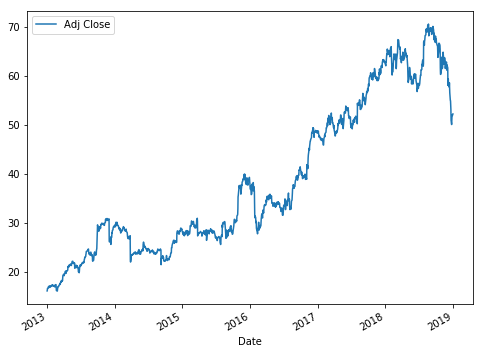

In [47]:
ticker="LDOS"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [48]:
closes.iloc[-1]

Adj Close    52.241898
Name: 2018-12-31 00:00:00, dtype: float64

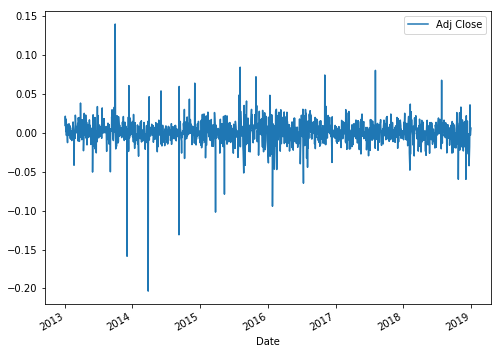

In [49]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [50]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0007814139770080142, 0.01694001501969712)

In [51]:
ndays=1826
ntraj=13
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)
simret

,0,1,2,3,4,5,6,7,8,9,10,11,12
2019-01-01,0.006058,-0.000912,-0.015672,-0.002445,0.011008,-0.004770,-0.032693,-0.005043,0.005948,0.006911,0.010649,0.008154,0.030755
2019-01-02,-0.021397,-0.013934,0.030627,0.011350,0.000772,0.003639,0.000137,0.007738,-0.025475,0.018099,-0.008199,0.014057,0.007447
2019-01-03,-0.000805,0.001574,0.010370,0.002592,0.020716,-0.011135,-0.022964,0.014675,-0.020160,0.001617,0.007162,-0.007134,0.006162
2019-01-04,-0.028099,-0.023414,0.002143,-0.011181,-0.003451,0.018772,0.005297,0.022438,-0.004516,0.029198,-0.022259,-0.013564,-0.020336
2019-01-05,0.008234,-0.023575,-0.006247,0.024407,0.016084,0.007553,0.009228,-0.012639,-0.024069,-0.000867,0.022137,0.011967,0.022957
2019-01-06,0.017281,0.012215,-0.005294,-0.011842,-0.005622,0.025450,0.041286,-0.008517,0.002315,-0.002483,-0.028938,-0.008508,0.013050
2019-01-07,-0.028330,-0.022136,-0.002115,-0.010228,0.019040,-0.009861,0.013428,-0.036298,-0.020518,0.002700,-0.013897,-0.037311,0.024336
2019-01-08,-0.015051,-0.026547,0.021875,-0.021717,-0.015389,0.039025,-0.002409,-0.012306,-0.022030,-0.011691,0.013775,0.007729,0.016546
2019-01-09,-0.008198,0.005197,0.021816,0.012583,0.017846,-0.038885,0.005495,0.015600,-0.005978,-0.053221,-0.005818,0.020922,0.021443
2019-01-10,0.007131,-0.000239,-0.014316,0.005566,-0.027866,0.006765,-0.002917,0.021464,0.022143,-0.021844,0.019690,0.005075,0.005242


#### Fuente

https://es.finance.yahoo.com/screener/a288df9d-4ab8-4c26-ae31-cf0f95142d06